In [1]:

import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reads cleaned health care workers.csv
file = "../main_resources/hc_workers/cleaned_hcw_df.csv"
hcw_df = pd.read_csv(file, encoding='cp1252')
hcw_df = hcw_df


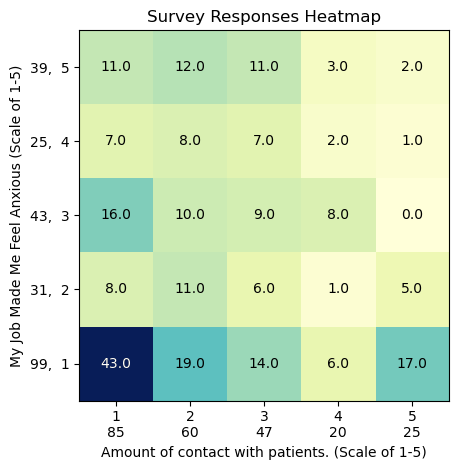

In [3]:
# create a 2D histogram of the data using a data frame from only the columns of contact amount and reported anxiety.
counts, xedges, yedges = np.histogram2d(hcw_df['What is the amount of close contact you have with patients'], hcw_df['My job made me feel anxious.'], bins=5)

# print the counts array

heatmap = np.array(counts)
heatmap = np.flipud(heatmap)
heatmap = np.round(heatmap)
fig, ax = plt.subplots()
im = ax.imshow(heatmap, cmap='YlGnBu')

# sums columns and rows and saves each as a list
col_sums=heatmap.sum(axis=0).tolist()
col_sums = [round(x) for x in col_sums]

row_sums=heatmap.sum(axis=1).tolist()
row_sums = [round(x) for x in row_sums]

## adds tick numbers and sums as labels
xlabels = col_sums
ylabels = row_sums
plt.xticks(ticks=np.arange(5),labels=[f"{i+1}\n{xlabels[i]}" for i in range(len(xlabels))])
plt.yticks(ticks=np.arange(5),labels=[f"{ylabels[i]},  {5-i}" for i in range(len(ylabels))])

# Adds axis labels and title.
plt.xlabel("Amount of contact with patients. (Scale of 1-5)")
plt.ylabel("My Job Made Me Feel Anxious (Scale of 1-5)")
plt.title("Survey Responses Heatmap")
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, heatmap[i, j],
                       ha="center", va="center", color="black")

text = ax.text(0, 4, heatmap[4, 0],
                ha="center", va="center", color="w")
fig.tight_layout()
plt.show()

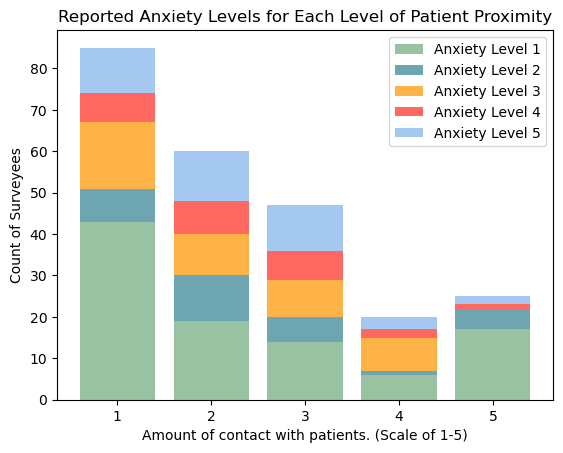

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array with the data to plot

data = np.flip(heatmap.T, axis=1)
# Create a list with the labels for the bars
labels = ['1', '2', '3', '4', '5']

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(labels))

# Define custom colors for the bars
colors = ['#99c2a2', '#6da6b1', '#ffb347', '#ff6961', '#a4c8f0']

# Create the stacked bar chart
plt.bar(x_pos, data[:, 0], label='Anxiety Level 1', color=colors[0])
plt.bar(x_pos, data[:, 1], bottom=data[:, 0], label='Anxiety Level 2', color=colors[1])
plt.bar(x_pos, data[:, 2], bottom=data[:, :2].sum(axis=1), label='Anxiety Level 3', color=colors[2])
plt.bar(x_pos, data[:, 3], bottom=data[:, :3].sum(axis=1), label='Anxiety Level 4', color=colors[3])
plt.bar(x_pos, data[:, 4], bottom=data[:, :4].sum(axis=1), label='Anxiety Level 5', color=colors[4])

# Add labels and title to the chart
plt.xlabel('Amount of contact with patients. (Scale of 1-5)')
plt.ylabel('Count of Surveyees')
plt.title('Reported Anxiety Levels for Each Level of Patient Proximity')

# Add a legend
plt.legend()

# Add tick labels for each group
plt.xticks(x_pos, labels)

# Show the chart
plt.show()









In [9]:
import scipy.stats as stats

# Enter your x and y coordinates
x = hcw_df['What is the amount of close contact you have with patients']
y = hcw_df['My job made me feel anxious.']

# Perform linear regression and obtain the slope, intercept, r-value, p-value, and standard error
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
t = slope/std_err
print(t)
# Print the p-value
print("p-value:", p_value)
print("r_value:", r_value)
print("std_err:", std_err)

-0.35933053456151876
p-value: 0.7196704985270244
r_value: -0.023433702695565623
std_err: 0.05690924072043707
